## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [1]:
# read data into a DataFrame
import numpy as np
import pandas as pd
import pylab as plt
import seaborn

from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
df[['TV','radio']]

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

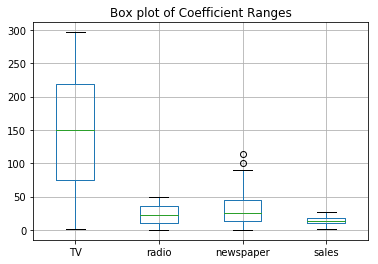

In [3]:
df.boxplot()
plt.title("Box plot of Coefficient Ranges")
plt.show()

The X-variables show very different ranges and magnitudes.  WIthout normalization, it would be difficult to discern the importance of each feature in predicting sales.

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

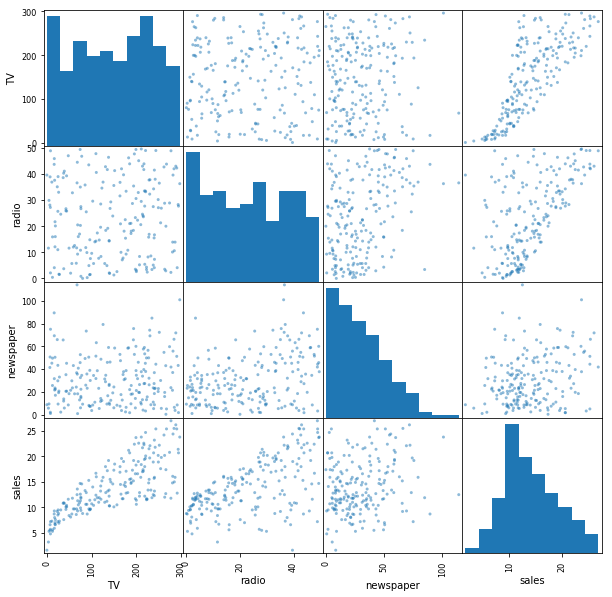

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [4]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(10,10)) 
plt.show()
df.corr()

Which of the variables seem correlated with one another? Which don't? Explain your answer

Newspaper and Radio show some positive correlation.  Other than that, none of the variables seem correlated.  TV and radio show correlation with sales, and could prove to be useful in predictive power.

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

a) Set y to be the sales in df

In [6]:
y = np.array(df["sales"],dtype=float)

b) Set X to be just the features described above in df

In [7]:
X = np.array(df[df.columns[:-1]].values,dtype=float)

c) Randomly split data into training and testing - 80% training, 20% testing.

In [8]:
X_trn, X_test, y_trn, y_test = train_test_split(X,y,test_size=0.20)

d) Train model on training data, and make predictions on testing data

In [9]:
estimator = LinearRegression()
estimator.fit(X_trn,y_trn)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [10]:
print("Test Rsq = {}".format(estimator.score(X_test,y_test)))

Test Rsq = 0.836590362131


The model explains around 90% of the variance in sales, out of sample.  This would be considered a succesful predictive model.

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

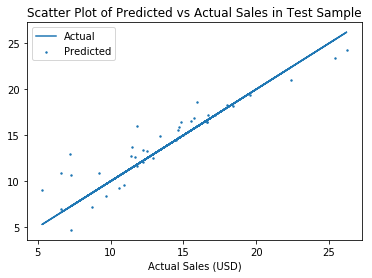

In [11]:
plt.scatter(y_test,estimator.predict(X_test),s=2,label="Predicted")
plt.plot(y_test,y_test,label="Actual")
plt.xlabel("Actual Sales (USD)")
plt.legend(loc="best")
plt.title("Scatter Plot of Predicted vs Actual Sales in Test Sample")
plt.show()

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

In [12]:
b = estimator.coef_
c = df.columns[:-1]
for _c in range(c.size):
    print("B_{} = {}\n".format(c[_c],b[_c]))                                      

B_TV = 0.04497128452

B_radio = 0.189693072412

B_newspaper = 0.00246186164109



You cannot properly evaluate the impotance of features in this model because the feature coefficients are not based on normalized data.  Hence, even though $B_{radio}$ appears to have the largest beta, it is not actually the most significant factor.

In order to properly evaluate the relative significance of coefficients, we would need to standardize the data as follows:

In [19]:
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
Xstd = StandardScaler().fit_transform(X)
X_trn, X_test, y_trn, y_test = train_test_split(Xstd,y,test_size=0.20)
lr = LinearRegression()
lr.fit(X_trn, y_trn)
print("Test Rsq = {}\n".format(lr.score(X_test,y_test)))

b = lr.coef_
c = df.columns[:-1]
for _c in range(c.size):
    print("B_{} = {}\n".format(c[_c],b[_c])) 


Test Rsq = 0.829913283543

B_TV = 3.93050330717

B_radio = 2.8841292247

B_newspaper = -0.10920496632



This shows that TV is the most signficant coefficent, with Radio following.

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

Well, as shown in part (g), standardizing input features is a good way to determine the importance of features in our prediction.  We could also have done some type of regularization alongside this.

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

In [ ]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations,learning_rate=0.0001):
    points = genfromtxt("data.csv", delimiter=",")
    learning_rate = learning_rate
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
    print "Running..."
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print "After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

    
run(100)

In [ ]:
# Initial guess of slope and intercept
b0 = 0.0
m0 = 0.0

# Vary the learning rate between 1e-4 and 1e-2 and plot error after 3 iterations

points = genfromtxt("data.csv", delimiter=",")
l = np.logspace(-4,-2,50)
err = []
for _l in l:    
    [b, m] = gradient_descent_runner(points, b0, m0, _l, 10)
    err.append(compute_error_for_line_given_points(b, m, points))

plt.xlabel('Learning Rate')
plt.ylabel('Error ')

plt.plot(l,err)
plt.title("Errors after 10 Iterations vs Learning Rate")
plt.show()

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

We will choose 10 as a "bad learning rate" which will overshoot the solution and not converge, 0.5e-4 as an inefficient rate which converges slowly, and 1.0e-4 as a good learning rate which converges quickly.

The "bad learning rate" shows error growing, while the "inefficient" learning rate does not get as close to the solution after 10 iterations.

## Bad Learning Rate (doesnt converge)

In [ ]:
l = 10
for n in range(10):
    run(n,l)
    plt.show()

## Good Learning Rate (Converges Quickly)

In [ ]:
l = 1.0e-4
for n in range(10):
    run(n,l)
    plt.show()

## Inefficient Learning Rate (Converges Less Quickly)

In [ ]:
l = 1.0e-5
for n in range(10):
    run(n,l)
    plt.show()